<a href="https://colab.research.google.com/github/seemavish/Sentiment-Analysis/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SENTIMENT ANALYSIS WITH LOGISTIC REGRESSION

In [ ]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/Colab\ Notebooks/archive.zip

unzip:  cannot find or open /content/gdrive/MyDrive/Colab Notebooks/archive.zip, /content/gdrive/MyDrive/Colab Notebooks/archive.zip.zip or /content/gdrive/MyDrive/Colab Notebooks/archive.zip.ZIP.


In [ ]:
start = time.time()

In [ ]:
dataset = pd.read_csv('/content/gdrive/MyDrive/Course Material/Academic Year 3/Trimester 8/COMP345: ML/IMDB Dataset.csv')

In [ ]:
dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
print("Shape: ",dataset.shape)
dataset.isna().sum()

Shape:  (50000, 2)


review       0
sentiment    0
dtype: int64

In [ ]:
print("Before eliminating duplicates: ",dataset.shape)

print("Duplicates found:",dataset.duplicated().sum(),"\n", dataset.duplicated())

dataset = dataset.drop_duplicates()

print("After eliminating duplicates: ",dataset.shape)

Before eliminating duplicates:  (50000, 2)
Duplicates found: 418 
 0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool
After eliminating duplicates:  (49582, 2)


In [ ]:
vectorizer = CountVectorizer(stop_words='english', min_df=20)
x = vectorizer.fit_transform(dataset.review)    #write code to fit transform text
y = dataset.sentiment # target column



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, train_size=0.5)  # split the data into half


In [ ]:
end = time.time()

print("Estimation_time =", end-start)

Estimation_time = 57.0301148891449


In [ ]:
print(x_train.shape)

(24791, 17511)


In [ ]:
#  Perform classification with Naive Bayes theorem

naive_model = MultinomialNB()
t0 = time.time()
naive_model.fit(x_train,y_train)  # train Naive Bayes classifier using MultinomialNB
t1 = time.time()
# fit the model to predict the labels in the test data
pred = naive_model.predict(x_test)
t2 = time.time()

time_linear_train = t1-t0
time_linear_predict = t2-t1

print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))

Training time: 0.074945s; Prediction time: 0.012984s


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score -> ",accuracy_score(pred, y_test)*100)

Accuracy Score ->  84.92194748094066


In [ ]:
# %matplotlib inline
# from sklearn.metrics import plot_confusion_matrix
# # write code to plot confusion matrix, give correct label names
# matrix = plot_confusion_matrix(naive_model, x_test, y_test, cmap=plt.cm.Blues)
# matrix.ax_.set_title('Confusion Matrix')
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.gcf().axes[0].tick_params()
# plt.gcf().axes[1].tick_params()
# plt.show()

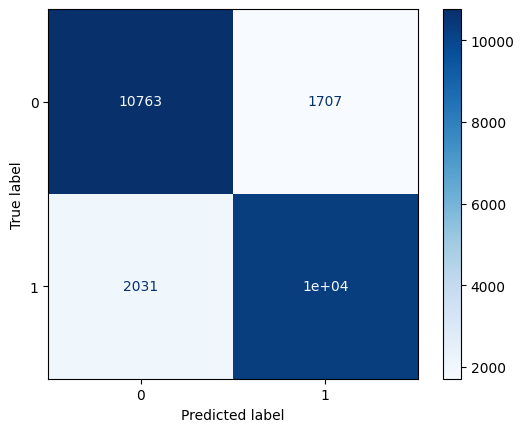

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# write code to plot confusion matrix, give correct label names
matrix = confusion_matrix(y_test, pred)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred, output_dict=True)
print('positive: ', report['positive'])
print('negative: ', report['negative'])



positive:  {'precision': 0.8577144286071517, 'recall': 0.8351594838081324, 'f1-score': 0.846286701208981, 'support': 12321}
negative:  {'precision': 0.8412537126778177, 'recall': 0.8631114675220529, 'f1-score': 0.852042431918936, 'support': 12470}


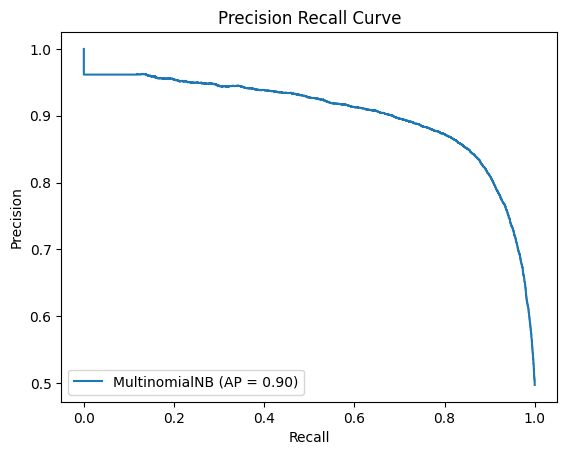

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay,f1_score
#write code here
matrix = PrecisionRecallDisplay.from_estimator(naive_model,x_test,y_test)
matrix.ax_.set_title('Precision Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [ ]:
naive_model.score(x_test,y_test) # this model is 85% accurate

0.8492194748094066

In [ ]:
probabilities = naive_model.predict_proba(x_test)     #get probabilities using predict_proba

#the roc score shows how well the classification model works
roc_auc_score(y_test, probabilities[:, 1])      # the roc score is almost equal to 1 which means the classifier can perfectly distinguish between positive and negative reviews

0.9158534463720965

In [ ]:
message = vectorizer.transform(["If you like original gut wrenching laughter you will like this movie. If you are young or old then you will love this movie, hell even my mom liked it. Great Camp!!!"])
#  review taken from positive class

naive_model.predict(x_test)

array(['positive', 'negative', 'positive', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [ ]:
naive_model.predict_proba(message)[0][1]
# probability that the review is classified under positive class

0.8988077346393435

In [ ]:
naive_model.predict_proba(message)[0][0]
# probability that the review is classified under negative class

0.10119226536065863

In [ ]:
message = vectorizer.transform(["Oh God, I must have seen this when I was only 11 or twelve, (don't ask how) I may have been young, but I wasn't stupid. Anyone could see that this is a bad movie, nasty, gross, unscary and very silly. I've seen more impressive effects at Disneyland, I've seen better performances at a school play, And I've seen more convincing crocodiles at the zoo, where they do nothing but sit in the water, ignoring the children tapping on the glass.<br /><br />The story is set in northern Australia. A handful of ambitious young people, are trying out a new water sport, surfing in shark filled waters. It soon becomes evident that something more dangerous is in the water. After they learn what, they get the help of a grizzly middle aged fisherman, who wants to kill the animal to avenge the eating of his family.<br /><br />I think I have seen every crocodile film made in the last fifteen years, the best of which is Lake Placid, and the worse of which is its sequel. Blood Surf would have to be the second worst croc flick I think, with Primeval and Crocodile tailing closely behind. The Australian Saltwater Crododile is one of the most dangerous creatures out there, resulting in more than a hundred injuries or deaths every year. Movies like Blood Surf however ruin not only the ferocious image of such a creature, but a good hour and a half of the viewer's life. Unless you really want to see it, avoid Blood Surf."])
#  review taken from negative class

naive_model.predict(x_test)

array(['positive', 'negative', 'positive', ..., 'negative', 'positive',
       'negative'], dtype='<U8')

In [ ]:
naive_model.predict_proba(message)[0][1]

4.9258974244370965e-11

In [ ]:
naive_model.predict_proba(message)[0][0]

0.9999999999507736

In [ ]:
end = time.time()

In [ ]:
print("Test time: ",end-start)

Test time:  1429.918570280075
